In [2]:
!pip install tensorflow
!pip install keras

                                              0.0/300.9 MB ? eta -:--:--
                                              0.2/300.9 MB 3.9 MB/s eta 0:01:17
                                              0.3/300.9 MB 4.7 MB/s eta 0:01:04
                                              0.6/300.9 MB 4.1 MB/s eta 0:01:13
                                              0.8/300.9 MB 4.5 MB/s eta 0:01:08
                                              1.1/300.9 MB 4.7 MB/s eta 0:01:04
                                              1.3/300.9 MB 4.4 MB/s eta 0:01:08
                                              1.5/300.9 MB 4.4 MB/s eta 0:01:09
                                              1.7/300.9 MB 4.7 MB/s eta 0:01:04
                                              1.8/300.9 MB 4.5 MB/s eta 0:01:07
                                              2.0/300.9 MB 4.4 MB/s eta 0:01:08
                                              2.1/300.9 MB 4.3 MB/s eta 0:01:10
                                              2

In [3]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

In [4]:
data=pd.read_csv(r'C:\Users\mmanasanjani\Desktop\Extra\MK\ML6\Credit Card Fraud\Dataset\creditcard.csv')

# Data Exploration

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-Processing

In [6]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [12]:
X_train.shape

(199364, 29)

In [13]:
X_test.shape

(85443, 29)

# 1: Using Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [15]:
decision_tree.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [16]:
y_pred = decision_tree.predict(X_test)

In [17]:
decision_tree.score(X_test,y_test)

0.9992977774656788

In [18]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [19]:
y_pred = decision_tree.predict(X)

In [20]:
y_expected = pd.DataFrame(y)

Confusion matrix, without normalization
[[284292     23]
 [    37    455]]


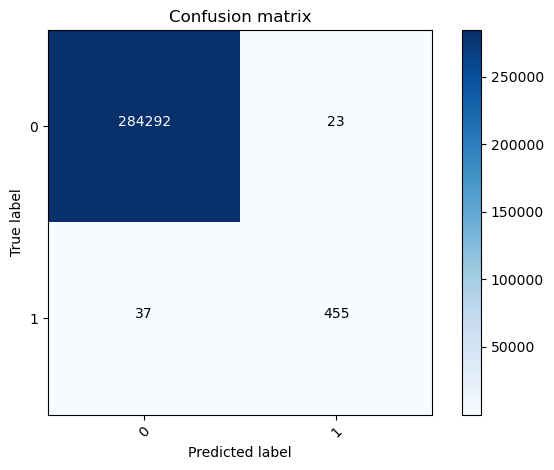

In [21]:
cm = confusion_matrix(y_expected,y_pred.round())
plot_confusion_matrix(cm,classes=[0,1])
plt.show()

# 2: Using Deep Neural Network

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [23]:
model = Sequential([
    Dense(units=16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7.4

In [25]:
#Training
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)


Epoch 1/5


13291/13291 [==============================] - 16s 1ms/step - loss: 0.0101 - accuracy: 0.9979
Epoch 2/5
13291/13291 [==============================] - 18s 1ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 24s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 25s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 26s 2ms/step - loss: 0.0031 - accuracy: 0.9994


In [26]:
score = model.evaluate(X_test, y_test)

2671/2671 [==============================] - 4s 1ms/step - loss: 0.0038 - accuracy: 0.9994


In [27]:
print(score)

[0.0037622866220772266, 0.9993680119514465]


In [28]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [29]:
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)

2671/2671 [==============================] - 3s 1ms/step


In [30]:
cm = confusion_matrix(y_test, y_pred.round())

In [31]:
print(cm)

[[85276    20]
 [   34   113]]


Confusion matrix, without normalization
[[85276    20]
 [   34   113]]


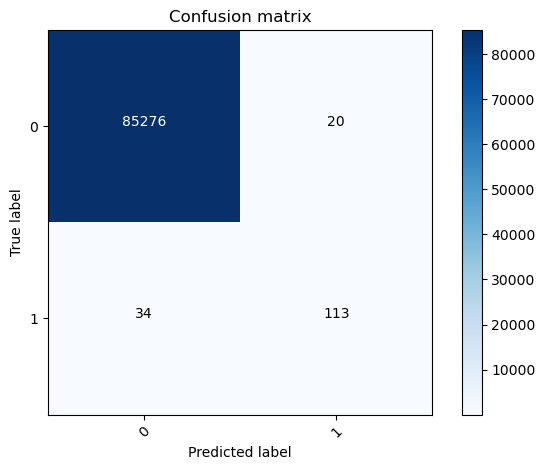

In [34]:
plot_confusion_matrix(cm, classes=[0,1])
plt.show()

# 3. Using Deep Neural Network + Sampling

Under sampling/smote + deep neural network model developed in 2nd step above

# Under Sampling

In [36]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [37]:
normal_indices = data[data.Class == 0].index

In [38]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [39]:
under_sample_indices = np.concatenate([fraud_indices,random_normal_indices])
print(len(under_sample_indices))

984


In [40]:
under_sample_data = data.iloc[under_sample_indices,:]

In [41]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample,y_undersample, test_size=0.3)

In [43]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1917 (7.49 KB)
Trainable params: 1917 (7.4

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 4ms/step - loss: 0.3070 - accuracy: 0.8924
Epoch 2/5
46/46 [==============================] - 0s 2ms/step - loss: 0.2076 - accuracy: 0.9084
Epoch 3/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1949 - accuracy: 0.9142
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1768 - accuracy: 0.9186
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1600 - accuracy: 0.9288


10/10 [==============================] - 0s 2ms/step
Confusion matrix, without normalization
[[143   0]
 [ 15 138]]


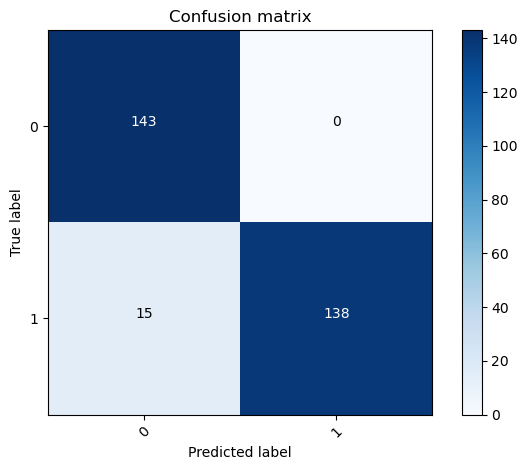

In [46]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

8901/8901 [==============================] - 11s 1ms/step
Confusion matrix, without normalization
[[284001    314]
 [    61    431]]


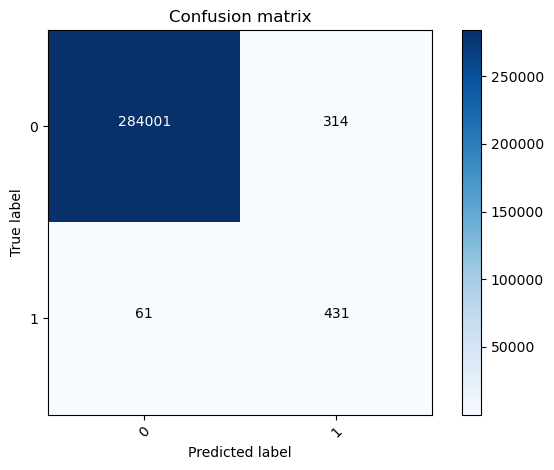

In [47]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

# SMOTE

In [49]:
!pip install -U imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     -----                                    30.7/235.6 kB ? eta -:--:--
     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [50]:
from imblearn.over_sampling import SMOTE

In [52]:
X_resample, y_resample = SMOTE().fit_resample(X,y.values.ravel())

In [53]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [55]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 46s 2ms/step - loss: 0.0329 - accuracy: 0.9885
Epoch 2/5
26537/26537 [==============================] - 49s 2ms/step - loss: 0.0126 - accuracy: 0.9967
Epoch 3/5
26537/26537 [==============================] - 46s 2ms/step - loss: 0.0100 - accuracy: 0.9975
Epoch 4/5
26537/26537 [==============================] - 45s 2ms/step - loss: 0.0093 - accuracy: 0.9977
Epoch 5/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0083 - accuracy: 0.9981


5331/5331 [==============================] - 5s 981us/step
Confusion matrix, without normalization
[[85040   203]
 [  190 85156]]


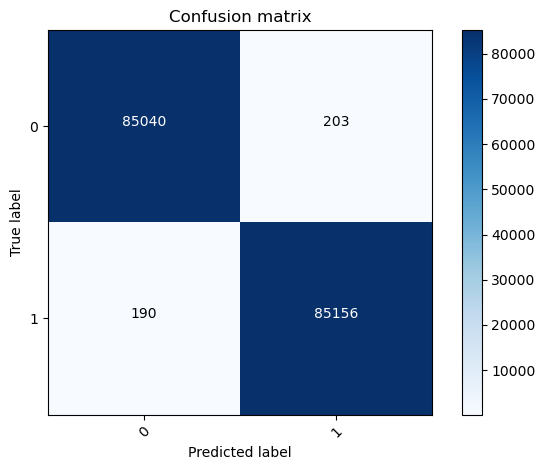

In [57]:
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

8901/8901 [==============================] - 8s 860us/step
Confusion matrix, without normalization
[[283716    599]
 [     9    483]]


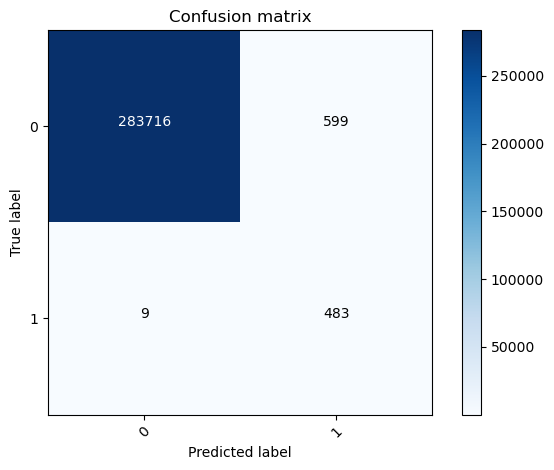

In [58]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cnf_matrix = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cnf_matrix, classes=[0,1])
plt.show()

# 4. Using Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
random_forest = RandomForestClassifier(n_estimators=100)

In [63]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [65]:
X_train.shape

(199364, 29)

In [66]:
y_train.shape

(199364, 1)

In [67]:
random_forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [68]:
y_pred = random_forest.predict(X_test)

In [69]:
random_forest.score(X_test,y_test)

0.9995084442259752

In [70]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [71]:
cnf_matrix = confusion_matrix(y_test,y_pred)

Confusion matrix, without normalization
[[85289     7]
 [   35   112]]


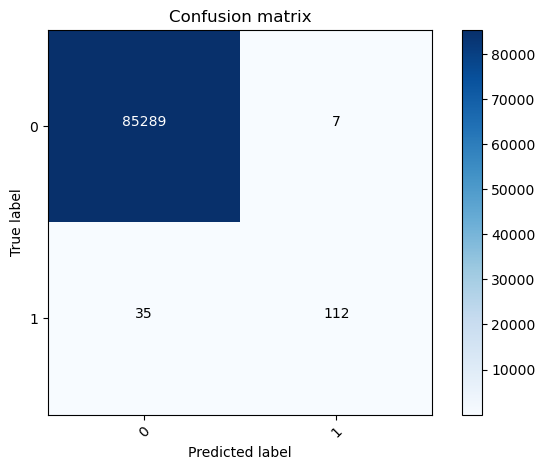

In [72]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])

In [73]:
plt.show()

In [74]:
y_pred = random_forest.predict(X)

In [75]:
cnf_matrix = confusion_matrix(y,y_pred.round())

Confusion matrix, without normalization
[[284308      7]
 [    35    457]]


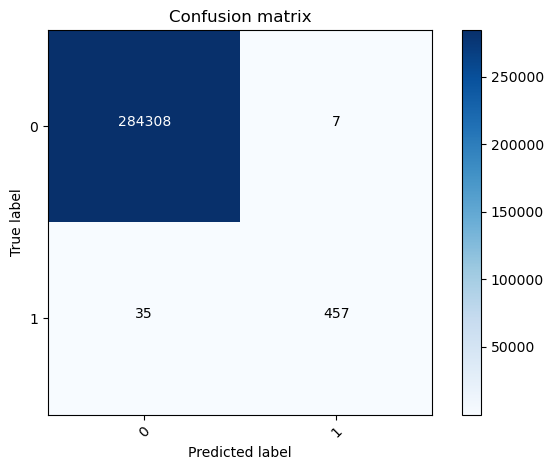

In [76]:
plot_confusion_matrix(cnf_matrix,classes=[0,1])